In [ ]:
import pandas as pd


In [ ]:
import kagglehub

path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data


In [ ]:
import os

file_path = os.path.join(path, 'Country-data.csv')

df = pd.read_csv(file_path)


In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
health_data = df[['child_mort', 'health', 'life_expec']]
health_data

,child_mort,health,life_expec
0,90.2,7.58,56.2
1,16.6,6.55,76.3
2,27.3,4.17,76.5
3,119.0,2.85,60.1
4,10.3,6.03,76.8
...,...,...,...
162,29.2,5.25,63.0
163,17.1,4.91,75.4
164,23.3,6.84,73.1
165,56.3,5.18,67.5


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
health_scaled = scaler.fit_transform(health_data)

In [ ]:
health_scaled

array([[ 1.29153238,  0.27908825, -1.61909203],
       [-0.5389489 , -0.09701618,  0.64786643],
       [-0.27283273, -0.96607302,  0.67042323],
       [ 2.00780766, -1.44807093, -1.17923442],
       [-0.69563412, -0.28689415,  0.70425843],
       [-0.5911773 ,  0.46896621,  0.59147443],
       [-0.50164289, -0.88208854,  0.30951442],
       [-0.8324228 ,  0.69901067,  1.29073525],
       [-0.84485813,  1.52790101,  1.12155924],
       [ 0.02312823, -0.34166664, -0.16417839],
       [-0.60858677,  0.39228473,  0.36590642],
       [-0.73791425, -0.67395308,  0.61403123],
       [ 0.27680906, -1.20342048, -0.01755919],
       [-0.5986385 ,  0.42149672,  0.69298003],
       [-0.81501333, -0.44025712, -0.01755919],
       [-0.839884  ,  1.41835604,  1.06516724],
       [-0.48423342, -0.58996859,  0.09522482],
       [ 1.8088423 , -0.99163352, -0.98750161],
       [ 0.11017558, -0.58996859,  0.17417362],
       [ 0.20717119, -0.72142257,  0.11778162],
       [-0.78019439,  1.56441601,  0.704

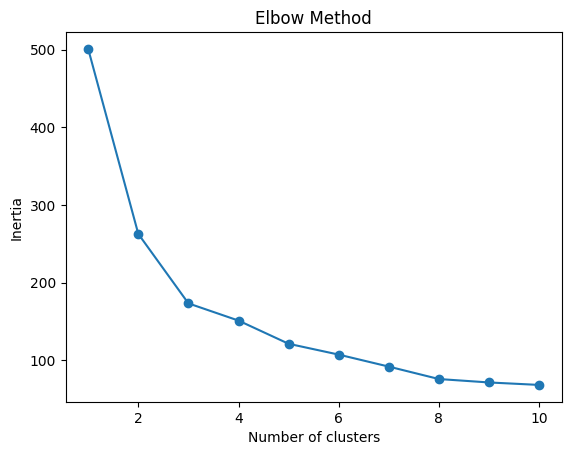

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(health_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(health_scaled)

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [ ]:
print(df.groupby('Cluster')[['child_mort', 'life_expec', 'health']].mean())

         child_mort  life_expec    health
Cluster                                  
0         92.810417   59.258333  6.067708
1         16.270588   75.112605  7.117395


In [ ]:
Clusters = df[['country', 'Cluster']]
Clusters

,country,Cluster
0,Afghanistan,0
1,Albania,1
2,Algeria,1
3,Angola,0
4,Antigua and Barbuda,1
...,...,...
162,Vanuatu,1
163,Venezuela,1
164,Vietnam,1
165,Yemen,0


In [ ]:
development_map = {
    0: 'Developing',
    1: 'Developed'
}

df['Development'] = df['Cluster'].map(development_map)
df['Development']

,Development
0,Developing
1,Developed
2,Developed
3,Developing
4,Developed
...,...
162,Developed
163,Developed
164,Developed
165,Developing


In [36]:
grouped = df.groupby('Development')['country'].apply(list).reset_index()

for _, row in grouped.iterrows():
    print(f"\n{row['Development']} Countries:")
    for country in row['country']:
        print(f"- {country}")


Developed Countries:
- Albania
- Algeria
- Antigua and Barbuda
- Argentina
- Armenia
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Brazil
- Brunei
- Bulgaria
- Cambodia
- Canada
- Cape Verde
- Chile
- China
- Colombia
- Costa Rica
- Croatia
- Cyprus
- Czech Republic
- Denmark
- Dominican Republic
- Ecuador
- Egypt
- El Salvador
- Estonia
- Fiji
- Finland
- France
- Georgia
- Germany
- Greece
- Grenada
- Guatemala
- Guyana
- Hungary
- Iceland
- Indonesia
- Iran
- Iraq
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Jordan
- Kazakhstan
- Kuwait
- Kyrgyz Republic
- Latvia
- Lebanon
- Libya
- Lithuania
- Luxembourg
- Macedonia, FYR
- Malaysia
- Maldives
- Malta
- Mauritius
- Micronesia, Fed. Sts.
- Moldova
- Mongolia
- Montenegro
- Morocco
- Nepal
- Netherlands
- New Zealand
- Norway
- Oman
- Panama
- Paraguay
- Peru
- Philippines
- Poland
- Portugal
- Qatar
- Romania
- Russia
- Samo